In [1]:
import pandas as pd

# List of file paths to the TSV tables
file_paths = [
    "../data/rnaseq_gene_counts/salmon.merged.gene_counts (1).tsv",
    "../data/rnaseq_gene_counts/salmon.merged.gene_counts (2).tsv",
    "../data/rnaseq_gene_counts/salmon.merged.gene_counts (3).tsv",
    "../data/rnaseq_gene_counts/salmon.merged.gene_counts.tsv"
]



In [2]:
# Initialize an empty DataFrame for merging
merged_df = None

# Loop through the files and merge them on 'gene_id' using an outer join
for file_path in file_paths:
    # Read the current file
    df = pd.read_csv(file_path, sep='\t')
    
    # Ignore the 'gene_name' column if it exists
    if 'gene_name' in df.columns:
        df = df.drop(columns=['gene_name'])
    
    # Merge with the existing DataFrame
    if merged_df is None:
        merged_df = df
    else:
        merged_df = pd.merge(merged_df, df, on='gene_id', how='outer')

# Write the merged DataFrame to a new TSV file
output_file = "../data/rnaseq_gene_counts/merged_gene_counts.tsv"
merged_df.to_csv(output_file, sep='\t', index=False)

print(f"Merged table saved to: {output_file}")


Merged table saved to: ../data/rnaseq_gene_counts/merged_gene_counts.tsv


In [3]:
!head ../data/rnaseq_gene_counts/merged_gene_counts.tsv

gene_id	SRX7656957	SRX7656958	SRX7656959	SRX7656960	SRX7656961	SRX7656962	SRX7656963	SRX7656964	SRX7656965	SRX7656966	SRX7656967	SRX7656968	SRX7656969	SRX7656970	SRX7656971	SRX7656972	SRX7656973	SRX7656974	SRX7656975	SRX7656976	SRX7656977	SRX7656978	SRX7656979	SRX7656980	SRX7656981	SRX7656982	SRX7656983	SRX7656984	SRX7656985	SRX7656986	SRX7656987	SRX7656988	SRX7656989	SRX7656990	SRX7656991	SRX7656992	SRX7656993	SRX7656994	SRX7656995	SRX7656996	SRX13037862	SRX13037863	SRX13037864	SRX13037865	SRX13037866	SRX13037867	SRX13037868	SRX13037869	SRX13037870	SRX13037871	SRX9845500	SRX9845501	SRX9845502	SRX9845503	SRX9845504	SRX9845505	SRX9845506	SRX9845507	SRX9845508	SRX9845509	SRX9845510	SRX9845511	SRX9845512	SRX9845513	SRX9845514	SRX9845515	SRX9845516	SRX9845517	SRX9845518	SRX9845519	SRX9845520	SRX9845521	SRX9845522	SRX9845523	SRX9845524	SRX9845525	SRX9845526	SRX9845527	SRX9845528	SRX9845529	SRX9845530	SRX9845531	SRX9845532	SRX9845533	SRX9845534	SRX9845535	SRX9845536	SRX9845537	SRX9845538	SRX

In [4]:
!head -1 ../data/rnaseq_gene_counts/merged_gene_counts.tsv |\
tr '\t' '\n' |\
wc -l

156


there are 155 samples so including the 'gene_id' header there should be 156 strings

In [5]:
#see if any values are NaN
!grep 'NaN' ../data/rnaseq_gene_counts/merged_gene_counts.tsv |\
head

looks like there are values for all genes in the table. Now let's get the meta data

In [6]:
# List all metadata file paths (update the file paths or pattern accordingly)
metadata_files = [
    "../data/SraRunTable.csv",
    "../data/SraRunTable (1).csv",
    "../data/SraRunTable (2).csv",
    "../data/SraRunTable (3).csv"
]


In [7]:
from glob import glob

# Define the columns of interest
columns_of_interest = [
    "Experiment", "infection", "BREED", "treatment",
    "Trait", "tissue", "collection_time", "Collection_Date", "BioProject"
]

# Load and process each file, keeping only the columns of interest
processed_metadata = []
for file in metadata_files:
    # Read metadata file
    metadata = pd.read_csv(file)
    
    # Keep only the desired columns, fill missing columns with NaN
    filtered_metadata = metadata.reindex(columns=columns_of_interest)
    processed_metadata.append(filtered_metadata)

# Combine all metadata into a single DataFrame
merged_metadata = pd.concat(processed_metadata, ignore_index=True)

# Save the merged metadata to a new file
merged_metadata.to_csv("../data/merged_metadata.csv", index=False)
print("Merged metadata saved to 'merged_metadata.csv'")


Merged metadata saved to 'merged_metadata.csv'


In [8]:
!cat ../data/merged_metadata.csv

Experiment,infection,BREED,treatment,Trait,tissue,collection_time,Collection_Date,BioProject
SRX18040064,,ABC_VIMS_Family_2017084,Dose 1x10^6,tolerant,mantle,,6/20/2018,PRJNA894694
SRX18040063,,ABC_VIMS_Family_2017084,Control,tolerant,mantle,,6/20/2018,PRJNA894694
SRX18040062,,ABC_VIMS_Family_2017120,Dose 1x10^6,sensitive,mantle,,6/20/2018,PRJNA894694
SRX18040061,,ABC_VIMS_Family_2017120,Dose 1x10^8,sensitive,mantle,,6/20/2018,PRJNA894694
SRX18040060,,ABC_VIMS_Family_2017090,Dose 1x10^6,sensitive,mantle,,6/20/2018,PRJNA894694
SRX18040059,,ABC_VIMS_Family_2017120,Dose 1x10^7,sensitive,mantle,,6/20/2018,PRJNA894694
SRX18040057,,ABC_VIMS_Family_2017090,Control,sensitive,mantle,,6/20/2018,PRJNA894694
SRX18040056,,ABC_VIMS_Family_2017089,Dose 1x10^6,tolerant,mantle,,6/20/2018,PRJNA894694
SRX18040055,,ABC_VIMS_Family_2017084,Dose 1x10^8,tolerant,mantle,,6/20/2018,PRJNA894694
SRX18040058,,ABC_VIMS_Family_2017090,Dose 1x10^8,sensitive,mantle,,6/20/2018,PRJNA894694
SRX18040054,,ABC_VIMS_Family_

In [9]:
!wc -l ../data/merged_metadata.csv

156 ../data/merged_metadata.csv


In [10]:
!head -1 ../data/rnaseq_gene_counts/merged_gene_counts.tsv | awk -F"\t" '{print NF}' 

156


In [11]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [12]:
# Replace with the correct paths to your files
gene_counts = pd.read_csv("../data/rnaseq_gene_counts/merged_gene_counts.tsv", sep='\t')
metadata = pd.read_csv("../data/merged_metadata.csv")

# Simplify metadata for alignment
metadata.rename(columns={'Experiment': 'Sample'}, inplace=True)

# Align gene counts with metadata
gene_count_samples = set(gene_counts.columns[1:])
metadata_samples = set(metadata['Sample'])
aligned_gene_counts = gene_counts[['gene_id'] + list(gene_count_samples.intersection(metadata_samples))]

# Filter genes with low expression (e.g., total counts < 10 across all samples)
filtered_gene_counts = aligned_gene_counts.loc[
    aligned_gene_counts.iloc[:, 1:].sum(axis=1) > 10
]

# Calculate CPM normalization
total_counts_per_sample = filtered_gene_counts.iloc[:, 1:].sum(axis=0)
cpm_counts = filtered_gene_counts.iloc[:, 1:].div(total_counts_per_sample, axis=1) * 1e6
cpm_counts.insert(0, 'gene_id', filtered_gene_counts['gene_id'])

# Transpose CPM data for visualization
cpm_values = cpm_counts.drop(columns='gene_id').T


In [13]:
len(metadata_samples)

155

In [14]:
len(gene_count_samples)

155

In [15]:
print(gene_count_samples)

{'SRX7656992', 'SRX9845506', 'SRX9845530', 'SRX9845537', 'SRX9845512', 'SRX18040019', 'SRX7656991', 'SRX7656974', 'SRX9845513', 'SRX18040056', 'SRX9845529', 'SRX7656972', 'SRX18040013', 'SRX9845531', 'SRX18040011', 'SRX18040055', 'SRX18040041', 'SRX18040028', 'SRX18040004', 'SRX7656960', 'SRX9845520', 'SRX18040042', 'SRX18040045', 'SRX18040006', 'SRX9845511', 'SRX9845542', 'SRX13037863', 'SRX18040007', 'SRX18040058', 'SRX7656982', 'SRX18040030', 'SRX18040031', 'SRX9845539', 'SRX18040063', 'SRX7656980', 'SRX7656961', 'SRX13037868', 'SRX7656978', 'SRX9845505', 'SRX18040038', 'SRX7656983', 'SRX18040018', 'SRX9845517', 'SRX7656970', 'SRX7656964', 'SRX7656993', 'SRX18040014', 'SRX9845501', 'SRX18040005', 'SRX13037871', 'SRX9845504', 'SRX18040008', 'SRX18040049', 'SRX9845514', 'SRX18040044', 'SRX18040061', 'SRX18040047', 'SRX18040020', 'SRX9845540', 'SRX7656975', 'SRX7656990', 'SRX9845533', 'SRX7656976', 'SRX9845528', 'SRX7656984', 'SRX18040054', 'SRX9845534', 'SRX9845524', 'SRX9845532', 'SR

In [16]:
cpm_values.head()

,0,1,4,5,6,7,8,9,10,11,...,38259,38260,38261,38262,38263,38532,38533,38704,38740,38761
SRX7656992,1.003817,0.000000,7.399136,2.007634,12.045805,3.867707,0.0,0.000000,6.022902,19.072524,...,47.947322,1.003817,6.022902,59.225207,1.003817,0.0,0.0,0.0,0.0,0.0
SRX9845506,0.500934,7.347029,45.815238,1.572431,7.818909,11.253979,0.0,37.737013,0.500934,61.448046,...,28.710019,7.847963,5.844228,27.551359,105.530053,0.0,0.0,0.0,0.0,0.0
SRX9845530,0.000000,1.298827,4.448051,1.832068,17.587711,8.684393,0.0,14.575730,1.010199,112.997845,...,2.002215,0.432942,5.339624,27.708319,77.496706,0.0,0.0,0.0,0.0,0.0
SRX9845537,0.884278,17.938202,4.738464,1.009466,15.901584,8.034041,0.0,5.305665,0.505301,70.615879,...,242.734694,3.284459,1.768555,20.338384,145.147845,0.0,0.0,0.0,0.0,0.0
SRX9845512,0.466769,1.867075,14.599827,2.064518,11.142237,13.691261,0.0,22.404900,0.700153,60.446321,...,163.174889,0.466769,4.200919,28.006125,221.015006,0.0,0.0,0.0,0.0,0.0


In [17]:
cpm_counts.head()

,gene_id,SRX7656992,SRX9845506,SRX9845530,SRX9845537,SRX9845512,SRX18040056,SRX18040019,SRX7656991,SRX7656974,...,SRX18040024,SRX18040026,SRX18040053,SRX18040033,SRX13037869,SRX18040034,SRX7656977,SRX9845507,SRX9845502,SRX18040046
0,LOC111099029,1.003817,0.500934,0.000000,0.884278,0.466769,0.000000,1.617477,0.000000,0.000000,...,0.815760,0.126175,7.522573,0.292134,1.002973,0.046183,0.000000,0.917177,0.442103,0.920399
1,LOC111099030,0.000000,7.347029,1.298827,17.938202,1.867075,0.000000,2.818840,0.000000,0.000000,...,7.681736,4.605391,0.056668,1.509231,0.000000,0.749205,0.000000,76.302378,8.621008,10.860714
4,LOC111099033,7.399136,45.815238,4.448051,4.738464,14.599827,10.726968,8.586269,7.078919,8.626124,...,7.875921,8.884431,6.363306,10.568466,8.479067,11.480493,2.549536,24.326298,24.602146,1.992481
5,LOC111099034,2.007634,1.572431,1.832068,1.009466,2.064518,2.527253,1.846877,0.000000,0.000000,...,1.872712,2.154124,1.587398,2.980781,1.017190,3.425471,1.502264,0.843436,2.374977,1.457913
6,LOC111099035,12.045805,7.818909,17.587711,15.901584,11.142237,4.680832,1.072457,6.189630,6.469593,...,1.386825,6.020508,2.454086,4.747312,5.216728,3.848344,7.788539,12.134625,12.015032,2.361193


In [18]:
# Summary statistics for the raw (unnormalized) gene count data
raw_summary = filtered_gene_counts.describe()

# Calculate library sizes (total counts per sample)
library_sizes = filtered_gene_counts.sum(axis=0)

# Display key statistics
#raw_summary, library_sizes

In [19]:
# Convert index (rownames) to a column
cpm_values_ids = cpm_values.reset_index()

# Rename the new column if desired
cpm_values_ids.rename(columns={"index": "Sample"}, inplace=True)

#preview output
cpm_values_ids.head()

,Sample,0,1,4,5,6,7,8,9,10,...,38259,38260,38261,38262,38263,38532,38533,38704,38740,38761
0,SRX7656992,1.003817,0.000000,7.399136,2.007634,12.045805,3.867707,0.0,0.000000,6.022902,...,47.947322,1.003817,6.022902,59.225207,1.003817,0.0,0.0,0.0,0.0,0.0
1,SRX9845506,0.500934,7.347029,45.815238,1.572431,7.818909,11.253979,0.0,37.737013,0.500934,...,28.710019,7.847963,5.844228,27.551359,105.530053,0.0,0.0,0.0,0.0,0.0
2,SRX9845530,0.000000,1.298827,4.448051,1.832068,17.587711,8.684393,0.0,14.575730,1.010199,...,2.002215,0.432942,5.339624,27.708319,77.496706,0.0,0.0,0.0,0.0,0.0
3,SRX9845537,0.884278,17.938202,4.738464,1.009466,15.901584,8.034041,0.0,5.305665,0.505301,...,242.734694,3.284459,1.768555,20.338384,145.147845,0.0,0.0,0.0,0.0,0.0
4,SRX9845512,0.466769,1.867075,14.599827,2.064518,11.142237,13.691261,0.0,22.404900,0.700153,...,163.174889,0.466769,4.200919,28.006125,221.015006,0.0,0.0,0.0,0.0,0.0


In [20]:
#merge meta data back with cpm data
metadata_cpm_values = pd.merge(metadata, cpm_values_ids, on='Sample', how='outer')
#preview output 
metadata_cpm_values.head()

,Sample,infection,BREED,treatment,Trait,tissue,collection_time,Collection_Date,BioProject,0,...,38259,38260,38261,38262,38263,38532,38533,38704,38740,38761
0,SRX18040064,NaN,ABC_VIMS_Family_2017084,Dose 1x10^6,tolerant,mantle,NaN,6/20/2018,PRJNA894694,0.258556,...,25.833410,20.425960,5.602057,15.254831,72.481994,0.0,0.0,0.0,0.0,0.0
1,SRX18040063,NaN,ABC_VIMS_Family_2017084,Control,tolerant,mantle,NaN,6/20/2018,PRJNA894694,1.193892,...,215.640190,5.044789,7.269509,35.313522,237.042410,0.0,0.0,0.0,0.0,0.0
2,SRX18040062,NaN,ABC_VIMS_Family_2017120,Dose 1x10^6,sensitive,mantle,NaN,6/20/2018,PRJNA894694,0.651034,...,292.493866,5.246572,8.846410,44.997972,222.041058,0.0,0.0,0.0,0.0,0.0
3,SRX18040061,NaN,ABC_VIMS_Family_2017120,Dose 1x10^8,sensitive,mantle,NaN,6/20/2018,PRJNA894694,2.083967,...,68.322907,1.387313,6.603612,27.246834,117.533186,0.0,0.0,0.0,0.0,0.0
4,SRX18040060,NaN,ABC_VIMS_Family_2017090,Dose 1x10^6,sensitive,mantle,NaN,6/20/2018,PRJNA894694,0.146159,...,1.315434,2.192390,4.384779,45.309385,69.864149,0.0,0.0,0.0,0.0,0.0


In [21]:
# Reshape the filtered CPM data to a long format for plotting
#.columns[10:]

cpm_long_format = metadata_cpm_values.melt(
    id_vars=["Sample","infection", "BREED", "treatment", "Trait", "tissue", "collection_time", "Collection_Date", "BioProject" ],  # Columns to keep
    var_name="Gene",                      # Name for gene column
    value_name="Count"                    # Name for count column
)

#preview output
cpm_long_format.head()


,Sample,infection,BREED,treatment,Trait,tissue,collection_time,Collection_Date,BioProject,Gene,Count
0,SRX18040064,NaN,ABC_VIMS_Family_2017084,Dose 1x10^6,tolerant,mantle,NaN,6/20/2018,PRJNA894694,0,0.258556
1,SRX18040063,NaN,ABC_VIMS_Family_2017084,Control,tolerant,mantle,NaN,6/20/2018,PRJNA894694,0,1.193892
2,SRX18040062,NaN,ABC_VIMS_Family_2017120,Dose 1x10^6,sensitive,mantle,NaN,6/20/2018,PRJNA894694,0,0.651034
3,SRX18040061,NaN,ABC_VIMS_Family_2017120,Dose 1x10^8,sensitive,mantle,NaN,6/20/2018,PRJNA894694,0,2.083967
4,SRX18040060,NaN,ABC_VIMS_Family_2017090,Dose 1x10^6,sensitive,mantle,NaN,6/20/2018,PRJNA894694,0,0.146159


In [22]:
# Log-scale the CPM values (handling zeros by replacing them with NaN, if necessary)
cpm_long_format['log_CPM'] = np.log10(cpm_long_format['Count'].replace(0, np.nan))
cpm_long_format.head()

,Sample,infection,BREED,treatment,Trait,tissue,collection_time,Collection_Date,BioProject,Gene,Count,log_CPM
0,SRX18040064,NaN,ABC_VIMS_Family_2017084,Dose 1x10^6,tolerant,mantle,NaN,6/20/2018,PRJNA894694,0,0.258556,-0.587445
1,SRX18040063,NaN,ABC_VIMS_Family_2017084,Control,tolerant,mantle,NaN,6/20/2018,PRJNA894694,0,1.193892,0.076965
2,SRX18040062,NaN,ABC_VIMS_Family_2017120,Dose 1x10^6,sensitive,mantle,NaN,6/20/2018,PRJNA894694,0,0.651034,-0.186396
3,SRX18040061,NaN,ABC_VIMS_Family_2017120,Dose 1x10^8,sensitive,mantle,NaN,6/20/2018,PRJNA894694,0,2.083967,0.318891
4,SRX18040060,NaN,ABC_VIMS_Family_2017090,Dose 1x10^6,sensitive,mantle,NaN,6/20/2018,PRJNA894694,0,0.146159,-0.835174


/home/shellytrigg/bin/anaconda3/lib/python3.8/site-packages/plotnine/layer.py:284: PlotnineWarning: stat_boxplot : Removed 1637579 rows containing non-finite values.


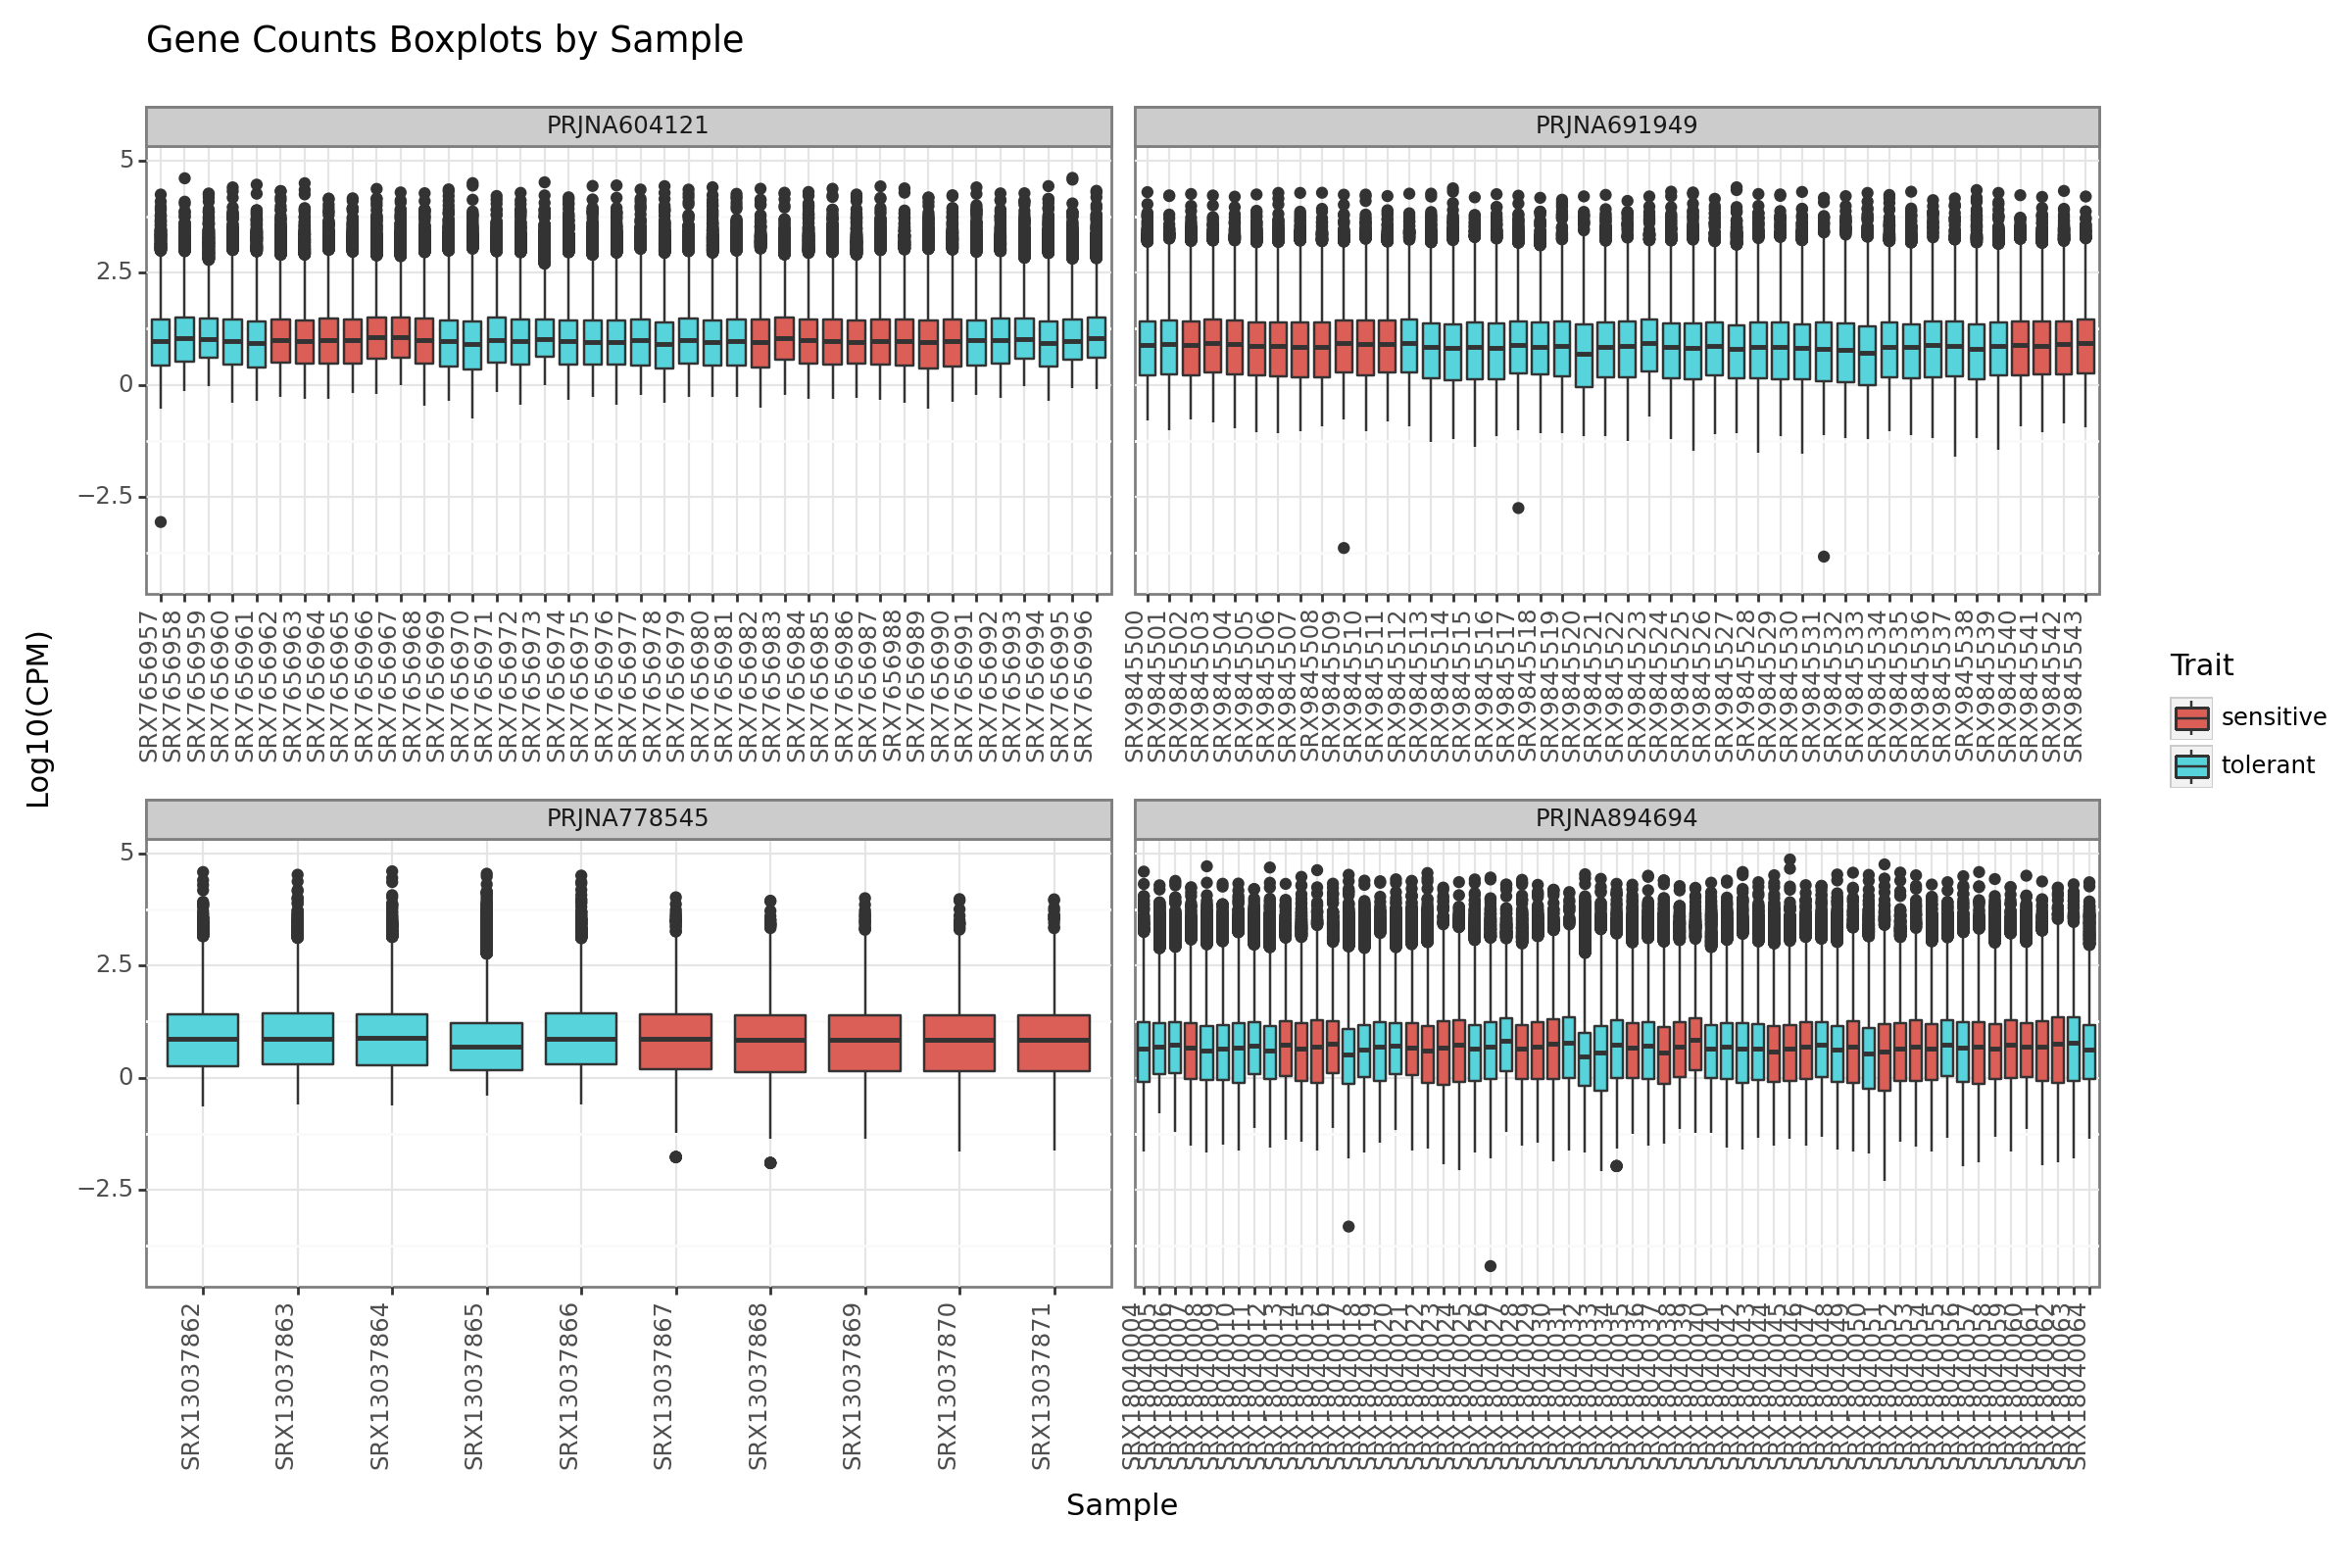

<Figure Size: (1200 x 800)>

/home/shellytrigg/bin/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 12 x 8 in image.
/home/shellytrigg/bin/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: ../analyses/2025-01-03_RNAseq_all_AI_diffexp/Sample_logCPM_Boxplots.jpg
/home/shellytrigg/bin/anaconda3/lib/python3.8/site-packages/plotnine/layer.py:284: PlotnineWarning: stat_boxplot : Removed 1637579 rows containing non-finite values.


In [23]:
#import library for plotting facet plots
from plotnine import *
%matplotlib inline

# Create boxplots for each sample
plt = (
    ggplot(cpm_long_format, aes(x="Sample", y="log_CPM", fill = "Trait")) +
    geom_boxplot() +
    facet_wrap("~BioProject", scales="free_x") +
    labs(title="Gene Counts Boxplots by Sample", y="Log10(CPM)", x="Sample") +
    theme_bw() +    
    theme(axis_text_x=element_text(rotation=90, hjust=1)) +
    theme(figure_size=(12, 8)  # Adjust width and height in inches
    )
)

display(plt)

plt.save("../analyses/2025-01-03_RNAseq_all_AI_diffexp/Sample_logCPM_Boxplots.jpg", dpi = 300, units = "in", height = 8, width = 12)

All samples show fairly even coverage and no super obvious outliers from here. 
The BioProject numbers are not in the same order as the datasets.
From the top left going clockwise the order is Dataset 2, Dataset 4, Dataset 1, and Dataset 3. 

Now I want to try a PCA 

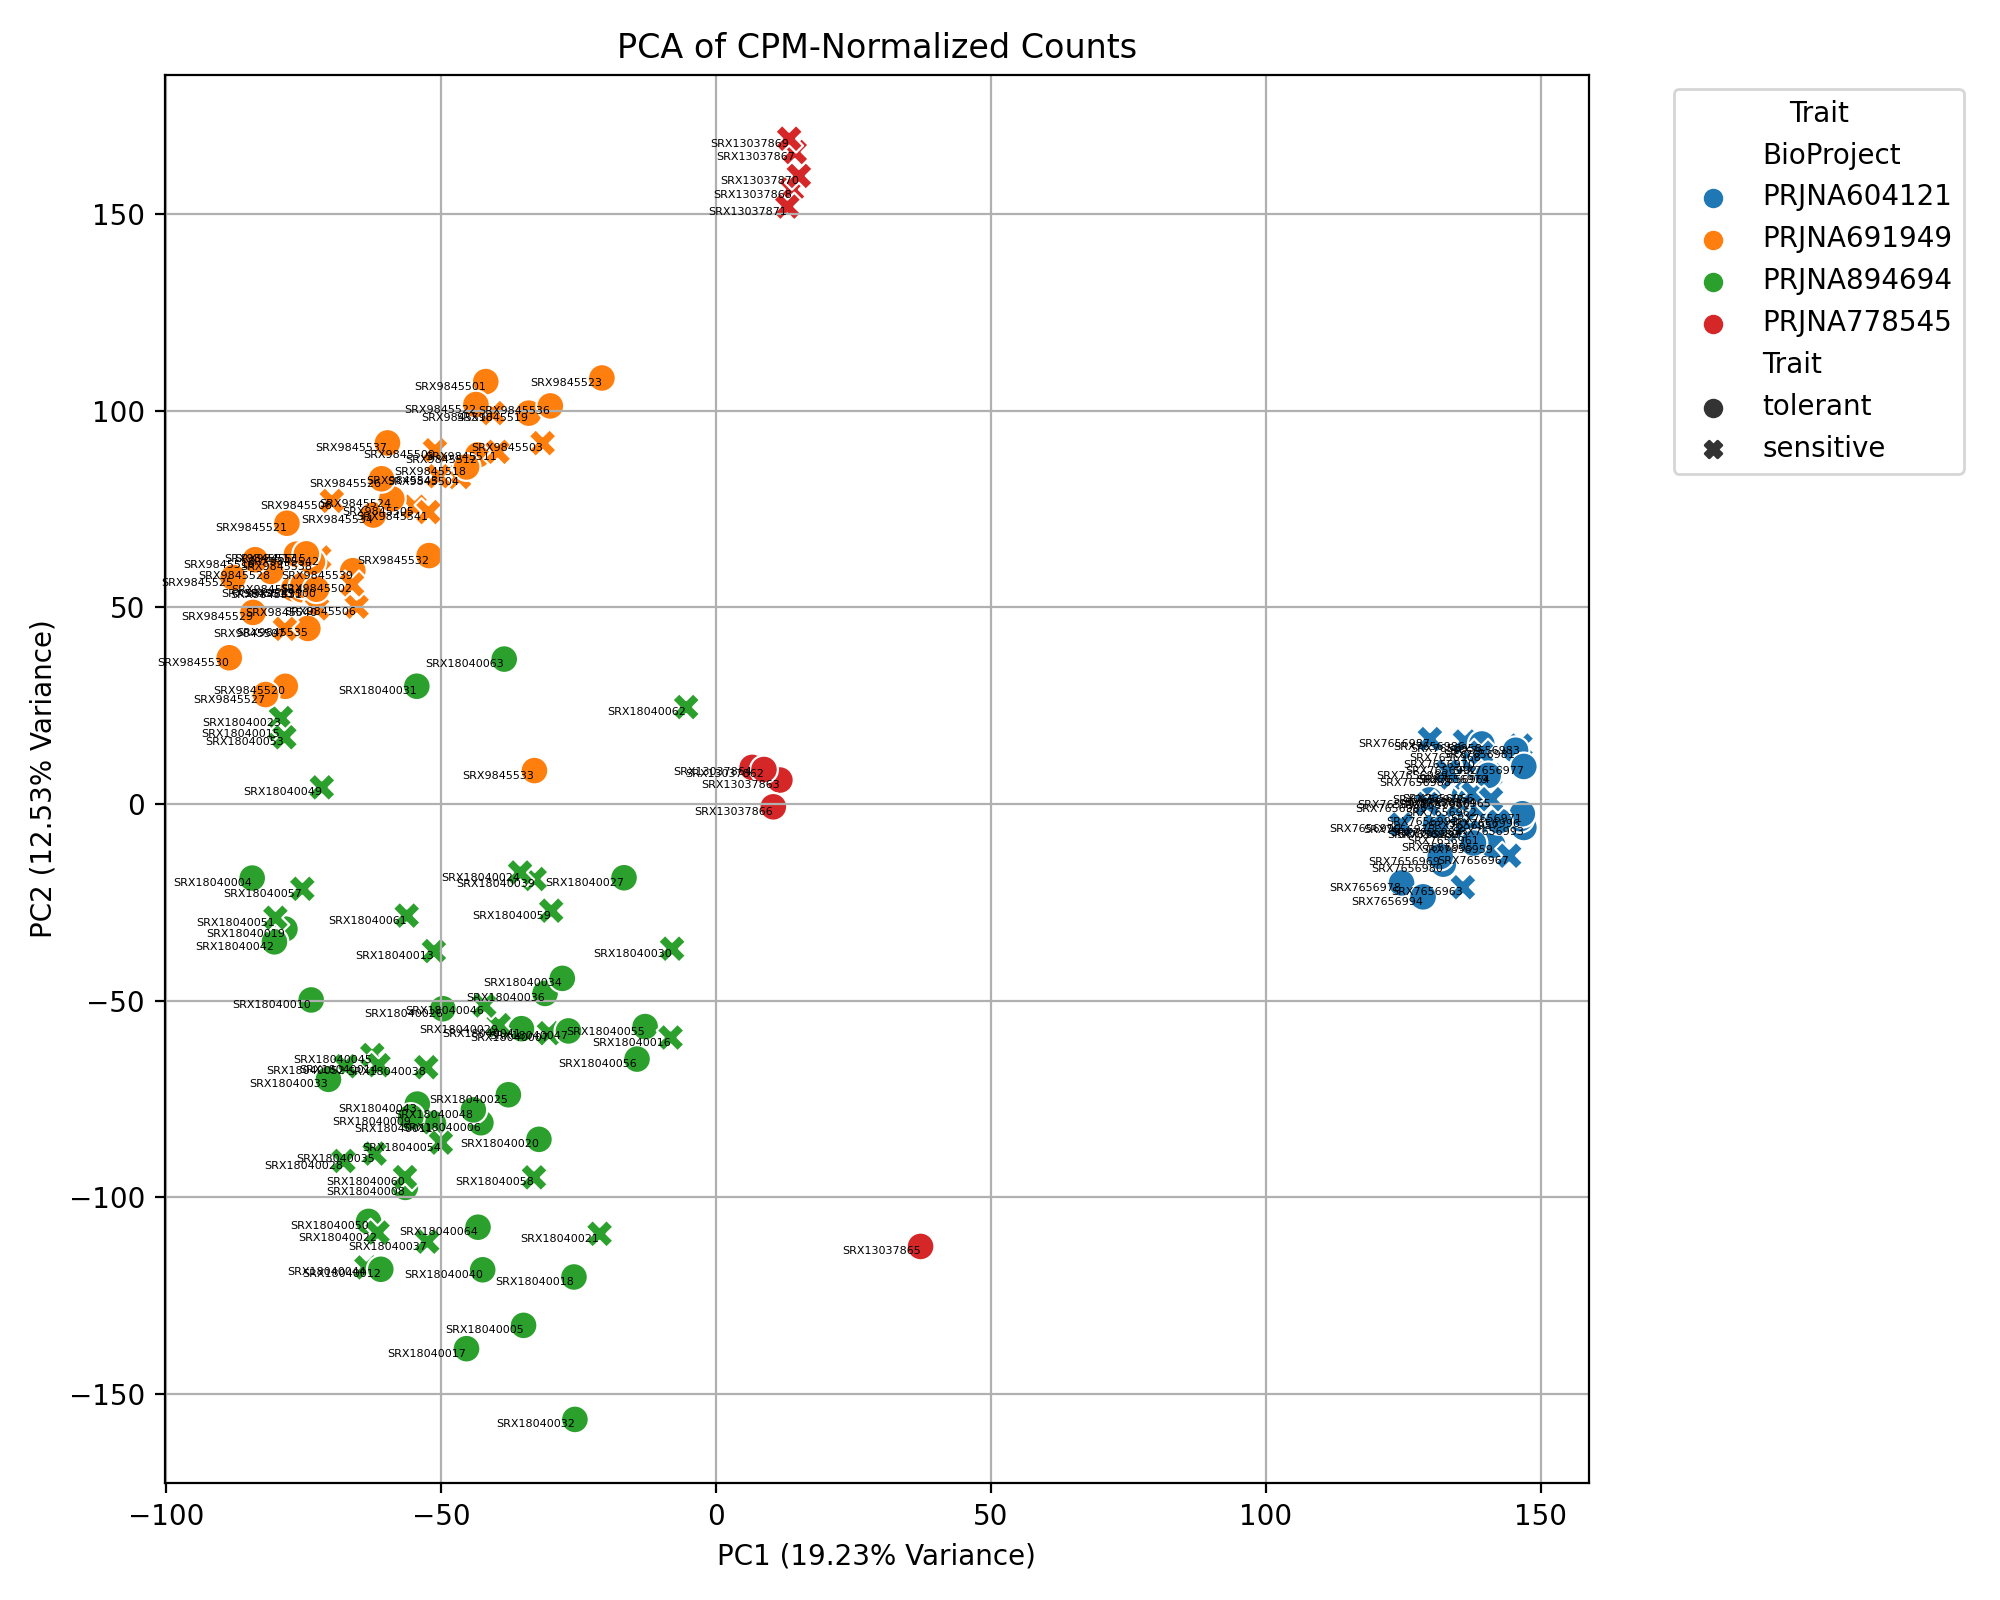

<Figure size 640x480 with 0 Axes>

In [25]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

# Transpose the CPM data for PCA (genes as features, samples as rows)
pca_data = cpm_values

# Standardize the data (mean=0, variance=1)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(np.log10(pca_data + 1))  # Log-transform CPM values

# Perform PCA
pca = PCA(n_components=2)  # Reduce to 2 principal components
principal_components = pca.fit_transform(scaled_data)

# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Sample'] = pca_data.index

# Merge with metadata to color by treatment or batch
pca_df = pd.merge(pca_df, metadata, left_on='Sample', right_on='Sample')

# Plot PCA
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=pca_df, 
    x='PC1', y='PC2', 
    hue='BioProject',  # Color by treatment
    style='Trait',    # Style points by batch
    s=100
)

# Add sample ID annotations
for i, row in pca_df.iterrows():
    plt.text(
        x=row['PC1'], 
        y=row['PC2'], 
        s=row['Sample'], 
        fontsize=4, 
        ha='right', 
        va='top'
    )
    
plt.title('PCA of CPM-Normalized Counts')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.2f}% Variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.2f}% Variance)')
plt.legend(title='Trait', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.tight_layout()
plt.show()


plt.savefig("../analyses/2025-01-03_RNAseq_all_AI_diffexp/PCA_all_genes_normCPM.png")

samples seem to cluster by tissue and study with the green and orange samples being mantle tissue and the red and blue samples being gill tissue. Blue is clustered pretty far from the others and this could be because these samples were in the wild and not in controled environments like the others.

I still want to try the mutual information approach to see if any tolerant-associated genes are identified across studies

In [26]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import matplotlib

matplotlib.use('Agg')

log_cpm = cpm_values.apply(lambda x: np.log2(x + 1), axis=1)

log_cpm.head()

,0,1,4,5,6,7,8,9,10,11,...,38259,38260,38261,38262,38263,38532,38533,38704,38740,38761
SRX7656992,1.002751,0.000000,3.070241,1.588629,3.705514,2.283242,0.0,0.000000,2.812067,4.327150,...,5.613158,1.002751,2.812067,5.912296,1.002751,0.0,0.0,0.0,0.0,0.0
SRX9845506,0.585860,3.061263,5.548906,1.363132,3.140600,3.615178,0.0,5.275641,0.585860,5.964585,...,4.892878,3.145345,2.774888,4.835488,6.735117,0.0,0.0,0.0,0.0,0.0
SRX9845530,0.000000,1.200898,2.445740,1.501856,4.216277,3.275662,0.0,3.961228,1.007338,6.832863,...,1.586027,0.518981,2.664397,4.843397,6.294560,0.0,0.0,0.0,0.0,0.0
SRX9845537,0.914011,4.243227,2.520665,1.006812,4.079087,3.175371,0.0,2.656649,0.590052,6.162208,...,7.929168,2.099113,1.469133,4.415379,7.191285,0.0,0.0,0.0,0.0,0.0
SRX9845512,0.552641,1.519580,3.963458,1.615660,3.601962,3.876886,0.0,4.548739,0.765665,5.941255,...,7.359090,0.552641,2.378767,4.858286,7.794513,0.0,0.0,0.0,0.0,0.0


In [28]:
#preview the data before log transformation to confirm it worked
log_cpm_T = log_cpm.T
log_cpm_T.head()

,SRX7656992,SRX9845506,SRX9845530,SRX9845537,SRX9845512,SRX18040056,SRX18040019,SRX7656991,SRX7656974,SRX9845513,...,SRX18040024,SRX18040026,SRX18040053,SRX18040033,SRX13037869,SRX18040034,SRX7656977,SRX9845507,SRX9845502,SRX18040046
0,1.002751,0.585860,0.000000,0.914011,0.552641,0.000000,1.388177,0.000000,0.000000,1.376372,...,0.860573,0.171431,3.091289,0.369755,1.002143,0.065135,0.000000,0.938984,0.528174,0.941406
1,0.000000,3.061263,1.200898,4.243227,1.519580,0.000000,1.933134,0.000000,0.000000,3.575317,...,3.117984,2.486815,0.079523,1.327246,0.000000,0.806699,0.000000,6.272441,3.266188,3.568119
4,3.070241,5.548906,2.445740,2.520665,3.963458,3.551758,3.260969,3.014162,3.266955,5.093209,...,3.149897,3.305158,2.880354,3.532126,3.244745,3.641603,1.827631,4.662564,4.678193,1.581342
5,1.588629,1.363132,1.501856,1.006812,1.615660,1.818545,1.509380,0.000000,0.000000,1.533854,...,1.522413,1.657240,1.371502,1.993051,1.012347,2.145831,1.323234,0.882398,1.754878,1.297434
6,3.705514,3.140600,4.216277,4.079087,3.601962,2.506102,1.051342,2.845918,2.901030,4.737553,...,1.255093,2.811575,1.788304,2.522887,2.636155,2.277492,3.135623,3.715303,3.702107,1.748973


In [30]:
# Calculate variance and prepare for mutual information analysis
gene_variances = log_cpm_T.var(axis=1)

# Select the top 50 most variable genes
top_genes = gene_variances.nlargest(50).index
# Subset the log-transformed CPM data for these top genes
top_genes_data = log_cpm_T.loc[top_genes]
#preview output
print(top_genes_data)


       SRX7656992  SRX9845506  SRX9845530  SRX9845537  SRX9845512  \
13418    1.002751   13.348466   12.546123   13.342329   11.754020   
12860    2.589544   12.155557   11.719465   13.225563   12.500825   
2283     0.000000   11.288026   11.537649    9.605280   11.240332   
24020    0.000000   11.830894   12.450754   12.346165   11.438761   
31629    0.000000   10.953732   11.781874   11.448601   10.045210   
25182    0.000000   10.450978   11.316048   10.885380    9.644051   
8131     0.000000   11.252370    3.128848   10.538682   11.470192   
19542    0.000000   11.429366   12.000011    9.765101    7.145647   
16038    0.000000    8.898322   10.007362    6.314795    9.836733   
14747   11.611765    0.000000    0.000000    0.171624    0.000000   
17925    0.000000    9.535693   10.804747    7.331403    7.291561   
20391   11.951305    1.172704    0.655304    0.000000    0.000000   
25668    0.000000    9.868025   11.342979   10.442413    9.644442   
17832    0.000000    9.985207   11

In [34]:
metadata_sorted = metadata.sort_values(by=['BioProject', 'Trait'])
sorted_samples = metadata_sorted['Sample']

In [35]:
# Subset and reorder the heatmap data to match the sorted samples
top_genes_data_sorted = top_genes_data[sorted_samples]

#preview top_genes_data_sorted
top_genes_data_sorted.head()



,SRX7656990,SRX7656989,SRX7656988,SRX7656987,SRX7656986,SRX7656985,SRX7656984,SRX7656983,SRX7656982,SRX7656968,...,SRX18040019,SRX18040018,SRX18040017,SRX18040012,SRX18040011,SRX18040010,SRX18040009,SRX18040008,SRX18040005,SRX18040004
13418,0.0,0.667171,0.000000,0.942783,0.000000,0.968527,0.000000,0.0,0.685398,0.0,...,14.535182,14.267838,14.540351,15.550726,13.954985,13.451893,14.140120,15.641200,13.924816,15.245658
12860,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.685398,0.0,...,13.385424,12.323629,13.632753,14.423402,13.032163,14.362316,12.154792,11.699844,12.654843,13.430757
2283,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.991209,0.0,0.000000,0.0,...,12.179921,12.250326,11.622152,11.786951,10.734371,11.403177,11.915130,13.496608,12.699713,12.466932
24020,0.0,1.121621,0.829677,0.000000,0.000000,0.000000,0.991209,0.0,0.000000,0.0,...,13.009512,11.899441,11.713367,12.562338,12.244963,13.090606,12.774032,12.675867,10.988661,13.424589
31629,0.0,0.000000,0.000000,0.000000,0.806833,0.968527,0.000000,0.0,0.000000,0.0,...,12.369495,11.279083,11.482471,12.140074,11.886681,12.860895,12.835158,12.288786,11.352765,12.339945


In [36]:
# Calculate mutual information for subsets of 10 genes
sample_metadata = metadata.set_index('Sample')
# Prepare data for mutual information calculation
# Flatten the top genes data for each sample to compare with categorical labels
expression_data = top_genes_data_sorted.T.values  # Shape: (samples, genes)


# Encode thermal tolerance and day as labels for mutual information analysis
labels_resilience_day = metadata_sorted[['BioProject','Trait']]
labels_combined = labels_resilience_day['BioProject'] + "-Trait" + \
    labels_resilience_day['Trait'].astype(str)
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels_combined)

# Calculate mutual information multiple times and average, because
# it's a stochastic algorithm
mi_scores_list = []
n_repeats = 5
for _ in range(n_repeats):
    mi_scores = mutual_info_classif(expression_data, encoded_labels,
                                    discrete_features=False,
                                    # Each repetition uses a different
                                    # random initialization
                                    random_state=None)
    mi_scores_list.append(mi_scores)

avg_mi_scores = np.mean(mi_scores_list, axis=0)

In [37]:
# Create a DataFrame for averaged results
mutual_info_results = pd.DataFrame({
    'Gene': top_genes_data_sorted.index,
    'Mutual_Information': avg_mi_scores
}).sort_values(by='Mutual_Information', ascending=False)

print(mutual_info_results.head(10))

     Gene  Mutual_Information
42  19340            1.207647
23  23654            1.058056
11  20391            0.981716
39  21241            0.948248
2    2283            0.854466
7   19542            0.838775
16  10161            0.834060
34  31664            0.813303
8   16038            0.809208
46  17436            0.805808


In [40]:
# Do PCA plot for the top 10, genes in mutual information score
top_genes_to_visualize = mutual_info_results.iloc[:10]['Gene']

# Subset the log-transformed CPM data for these genes
top_genes_data = log_cpm_T.loc[top_genes_to_visualize]

top_genes_data.head()

,SRX7656992,SRX9845506,SRX9845530,SRX9845537,SRX9845512,SRX18040056,SRX18040019,SRX7656991,SRX7656974,SRX9845513,...,SRX18040024,SRX18040026,SRX18040053,SRX18040033,SRX13037869,SRX18040034,SRX7656977,SRX9845507,SRX9845502,SRX18040046
19340,0.000000,11.176747,10.962718,10.286553,10.073981,11.406112,11.312679,1.570752,0.000000,10.887224,...,11.568704,7.971263,7.107721,11.655592,8.860344,11.519322,0.000000,10.861138,10.937590,11.564167
23654,4.084379,5.581720,8.425026,9.265172,6.026740,10.972430,10.296026,0.000000,0.000000,9.914703,...,10.431148,10.940480,9.278179,11.318511,9.671339,11.215294,0.000000,8.412652,7.205104,11.362789
20391,11.951305,1.172704,0.655304,0.000000,0.000000,2.228267,2.864738,11.957034,11.764265,0.741969,...,2.709679,2.608480,2.271277,2.128539,0.000000,2.522007,11.619054,2.664606,0.000000,2.921169
21241,0.000000,11.122765,11.346832,10.764029,10.223070,11.617853,11.902453,0.000000,4.367187,11.256646,...,11.762421,11.888433,11.137217,11.501438,9.370496,11.446928,0.000000,11.622067,10.960330,11.543657
2283,0.000000,11.288026,11.537649,9.605280,11.240332,9.868387,12.179921,0.914461,0.000000,12.007969,...,10.647827,12.907473,12.274529,11.635759,3.579886,10.807517,0.000000,11.800609,11.800274,11.439858


In [42]:
# Perform PCA for the top 10 genes
pca_data = top_genes_data.T

scaler = StandardScaler()
scaled_top_10_data = scaler.fit_transform(top_genes_data.T)  # Transpose so genes are features
pca_top_10 = PCA(n_components=2).fit_transform(scaled_top_10_data)


# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(data=pca_top_10, columns=['PC1', 'PC2'])
pca_df['Sample'] = pca_data.index

# Merge with metadata to color by treatment or batch
pca_df = pd.merge(pca_df, metadata, left_on='Sample', right_on='Sample')

# Plot PCA for Top 10 Genes
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=pca_df, 
    x='PC1', y='PC2', 
    hue='BioProject',  # Color by treatment
    style='Trait',    # Style points by batch
    s=100
)

# Add sample ID annotations
for i, row in pca_df.iterrows():
    plt.text(
        x=row['PC1'], 
        y=row['PC2'], 
        s=row['Sample'], 
        fontsize=4, 
        ha='right', 
        va='top'
    )
    
plt.title('PCA of CPM-Normalized Counts')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.2f}% Variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.2f}% Variance)')
plt.legend(title='Trait', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.tight_layout()
plt.show()

plt.savefig("../analyses/2025-01-03_RNAseq_all_AI_diffexp/PCA_top_10_mutual_info_genes.png")